In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file and fitting it into 'df' object.
adult_df = pd.read_csv('adult_dataset.csv')

In [4]:
# Let's understand the data, how it look like.
adult_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
adult_df.shape

(32561, 15)

In [7]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
adult_df.value_counts()

age  workclass         fnlwgt  education     education.num  marital.status      occupation         relationship   race   sex     capital.gain  capital.loss  hours.per.week  native.country  income
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
23   Private           240137  5th-6th       3              Never-married       Handlers-cleaners  Not-in-family  White  Male    0             0             55              Mexico          <=50K     2
38   Private           207202  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             48              United-States   >50K      2
30   Private           144593  HS-grad       9              Never-married       Other-service      Not-in-family  Black  Male    0             0             40              ?               <=50K     2


In [10]:
adult_df.columns[(adult_df == '?').any()]

Index(['workclass', 'occupation', 'native.country'], dtype='object')

In [11]:
adult_df.workclass.mode()

0    Private
Name: workclass, dtype: object

In [12]:
adult_df.occupation.mode()

0    Prof-specialty
Name: occupation, dtype: object

In [13]:
adult_df['native.country'].mode()

0    United-States
Name: native.country, dtype: object

In [14]:
# Rows with missing values represented as ?
adult_df_1 = adult_df[adult_df.workclass == '?']
adult_df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
adult_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


In [16]:
# Dropping the rows having missing values in workclass
adult_df = adult_df[adult_df['workclass'] != '?']
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [17]:
# Select all categorical variables
adult_df_cat = adult_df.select_dtypes(include = ['object'])

# Checking whether any other columns contains a '?'
adult_df_cat.apply(lambda x : x=='?', axis = 0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [18]:
# Dropping the '?'s
adult_df = adult_df[adult_df['occupation'] != '?']
adult_df = adult_df[adult_df['native.country'] != '?']

#### Now we have a clean dataframe which is ready for model building

In [19]:
# Clean DataFrame
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
from sklearn import preprocessing
# Encode categorical variable using Label Encoder 

# Select all categorical variables
adult_df_cat = adult_df.select_dtypes(include = ['object'])
adult_df_cat.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [21]:
# Apply Label Encoder to adult_df_cat
le = preprocessing.LabelEncoder()
adult_df_cat = adult_df_cat.apply(le.fit_transform)
adult_df_cat.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [22]:
adult_df_cat.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [23]:
# Concat adult_df_cat with original adult_df
adult_df = adult_df.drop(adult_df_cat.columns, axis = 1)
adult_df = pd.concat([adult_df, adult_df_cat], axis = 1)

In [24]:
adult_df['income'] = adult_df['income'].astype('category')

In [25]:
adult_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,2,15,4,10,1,4,1,38,0
32557,27,257302,12,0,0,38,2,7,2,12,5,4,0,38,0
32558,40,154374,9,0,0,40,2,11,2,6,0,4,1,38,1
32559,58,151910,9,0,0,40,2,11,6,0,4,4,0,38,0


In [26]:
# Importing train-test split
from sklearn.model_selection import train_test_split

In [27]:
X = adult_df.drop('income', axis = 1)
# Putting response variable to y
y = adult_df['income']

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 99)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt_default=DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default=dt_default.predict(X_test)
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [32]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


In [33]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [34]:
features=list(adult_df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

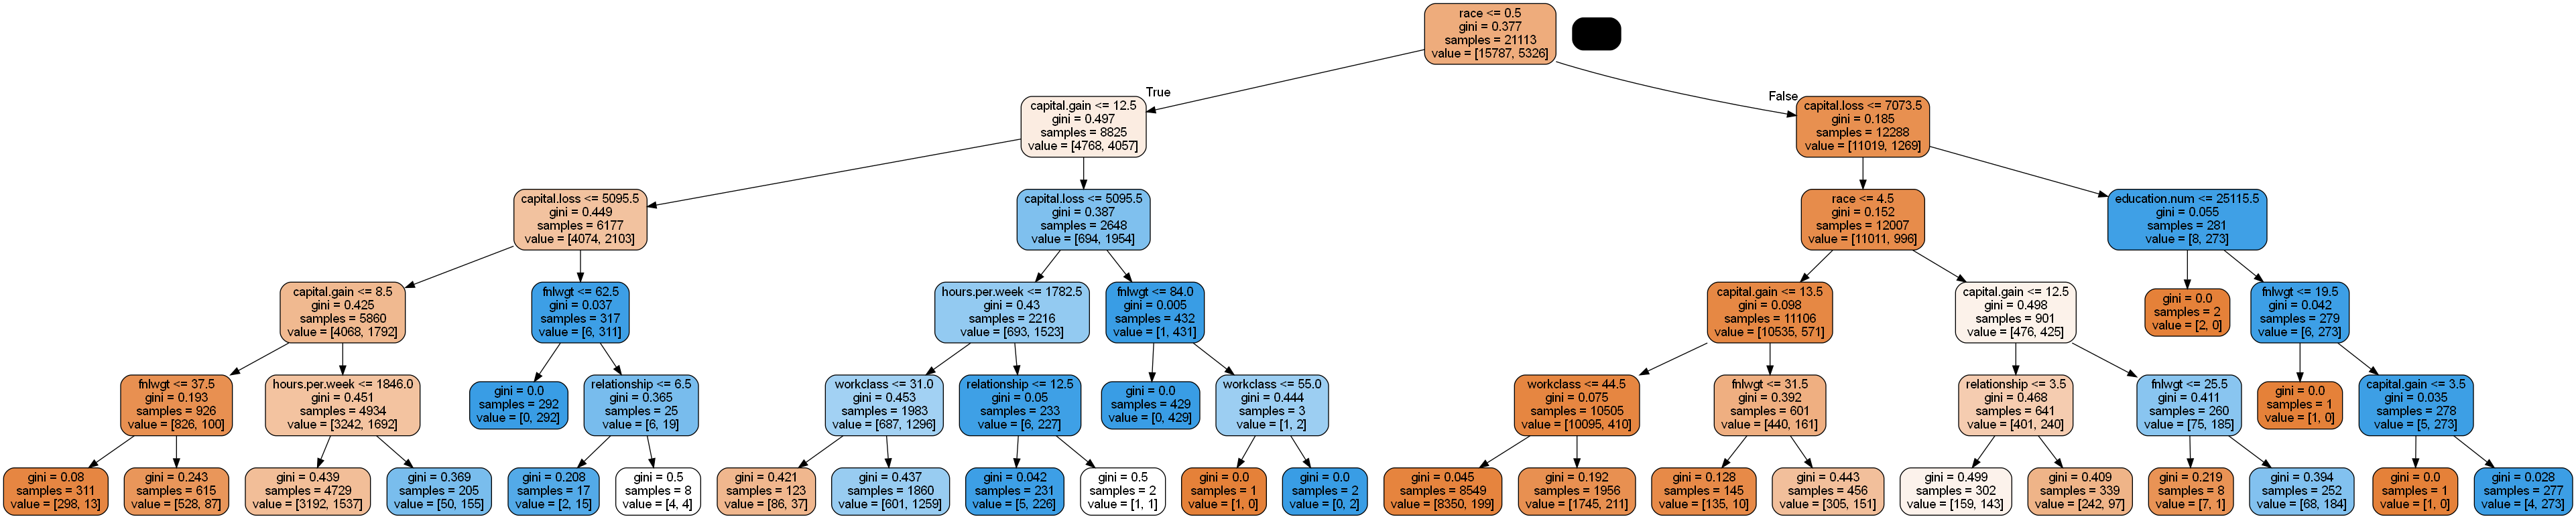

In [35]:
# Plotting tree with max_depth = 3
dot_data = StringIO()
export_graphviz(dt_default, out_file = dot_data, feature_names = features, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [37]:
n_folds=5
parameters={'max_depth': range(1, 40)}
dtree=DecisionTreeClassifier(criterion="gini", random_state=100)
tree=GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [38]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012284,0.002094,0.002484,0.000570,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.014485,0.000508,0.002145,0.000278,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.019777,0.000996,0.003000,0.000352,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.027900,0.002212,0.002486,0.000758,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.031520,0.001090,0.002374,0.000622,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


In [39]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [40]:
help(tree.cv_results_)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [41]:
pd.DataFrame(scores).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       39 non-null     float64
 1   std_fit_time        39 non-null     float64
 2   mean_score_time     39 non-null     float64
 3   std_score_time      39 non-null     float64
 4   param_max_depth     39 non-null     object 
 5   params              39 non-null     object 
 6   split0_test_score   39 non-null     float64
 7   split1_test_score   39 non-null     float64
 8   split2_test_score   39 non-null     float64
 9   split3_test_score   39 non-null     float64
 10  split4_test_score   39 non-null     float64
 11  mean_test_score     39 non-null     float64
 12  std_test_score      39 non-null     float64
 13  rank_test_score     39 non-null     int32  
 14  split0_train_score  39 non-null     float64
 15  split1_train_score  39 non-null     float64
 16  split2_tra

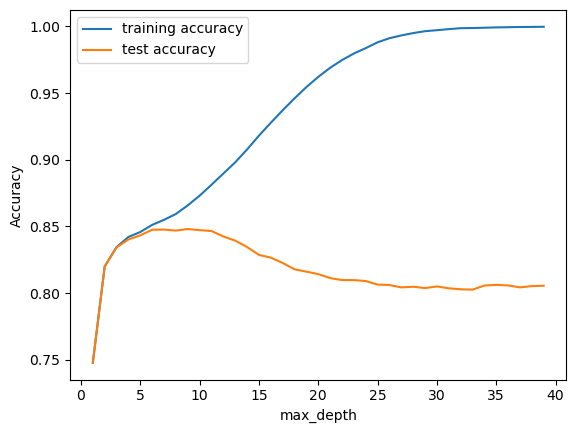

In [42]:
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='test accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

In [43]:
n_folds=5
parameters={'min_samples_leaf': range(5, 200, 20)}
dtree=DecisionTreeClassifier(criterion="gini", random_state=100)
tree=GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [44]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064879,0.002197,0.002760,0.000685,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,...,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.056229,0.003908,0.002653,0.000528,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,...,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.049920,0.001480,0.002278,0.000386,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,...,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.050785,0.002019,0.002431,0.000422,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,...,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.046484,0.000665,0.002600,0.000490,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,...,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


In [45]:
pd.DataFrame(scores).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean_fit_time           10 non-null     float64
 1   std_fit_time            10 non-null     float64
 2   mean_score_time         10 non-null     float64
 3   std_score_time          10 non-null     float64
 4   param_min_samples_leaf  10 non-null     object 
 5   params                  10 non-null     object 
 6   split0_test_score       10 non-null     float64
 7   split1_test_score       10 non-null     float64
 8   split2_test_score       10 non-null     float64
 9   split3_test_score       10 non-null     float64
 10  split4_test_score       10 non-null     float64
 11  mean_test_score         10 non-null     float64
 12  std_test_score          10 non-null     float64
 13  rank_test_score         10 non-null     int32  
 14  split0_train_score      10 non-null     float

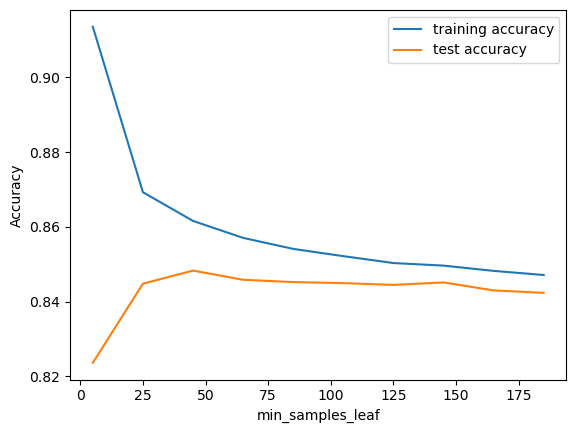

In [46]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label='test accuracy')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()

In [47]:
n_folds=5
parameters={'min_samples_split': range(5, 200, 20)}
dtree=DecisionTreeClassifier(criterion="gini", random_state=100)
tree=GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [48]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071242,0.002019,0.002611,0.000486,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,...,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.066054,0.000412,0.002348,0.000382,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,...,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.063418,0.001423,0.002275,0.000426,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,...,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.063463,0.003318,0.002406,0.000484,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,...,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.066825,0.002148,0.003184,0.000221,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,...,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


In [49]:
pd.DataFrame(scores).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            10 non-null     float64
 1   std_fit_time             10 non-null     float64
 2   mean_score_time          10 non-null     float64
 3   std_score_time           10 non-null     float64
 4   param_min_samples_split  10 non-null     object 
 5   params                   10 non-null     object 
 6   split0_test_score        10 non-null     float64
 7   split1_test_score        10 non-null     float64
 8   split2_test_score        10 non-null     float64
 9   split3_test_score        10 non-null     float64
 10  split4_test_score        10 non-null     float64
 11  mean_test_score          10 non-null     float64
 12  std_test_score           10 non-null     float64
 13  rank_test_score          10 non-null     int32  
 14  split0_train_score       10 n

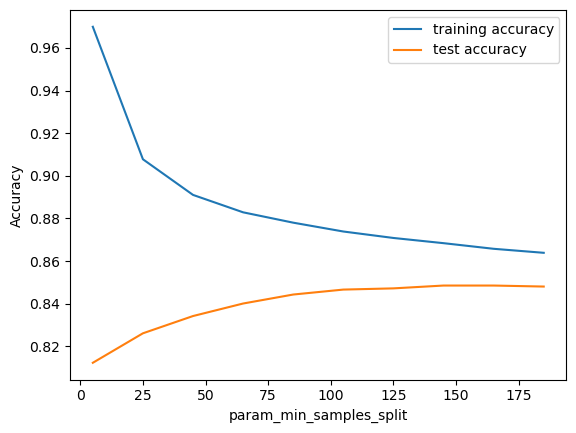

In [50]:
plt.figure()
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], label='test accuracy')
plt.xlabel("param_min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

In [53]:
param_grid={"max_depth": range(5,15,5),
            "min_samples_leaf": range(50,150,50),
            "min_samples_split": range(50,150,50),
            "criterion": ["entropy", "gini"]}

In [55]:
n_folds=5
dtree=DecisionTreeClassifier()
grid_search_fit=GridSearchCV(dtree, param_grid=param_grid, cv=n_folds, verbose=1)
grid_search_fit.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [57]:
cv_results=pd.DataFrame(grid_search_fit.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035727,0.005042,0.002581,5.102388e-04,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.030818,0.000849,0.002409,4.920360e-04,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.029983,0.000264,0.002270,3.877547e-04,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.029378,0.000469,0.002210,3.971080e-04,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.048246,0.000786,0.002169,2.108430e-04,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.047974,0.000649,0.002404,4.889886e-04,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.045168,0.000418,0.002004,9.841808e-07,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.044935,0.000564,0.002409,4.849555e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.025863,0.000167,0.002403,4.892040e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.026302,0.000428,0.002062,1.124913e-04,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [59]:
print("best accuracy", grid_search_fit.best_score_)
print(grid_search_fit.best_estimator_)

best accuracy 0.8510400232064759
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [60]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [61]:
clf_gini=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=10, min_samples_leaf=50, min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [62]:
clf_gini.score(X_train, y_train)

0.8564391607066736

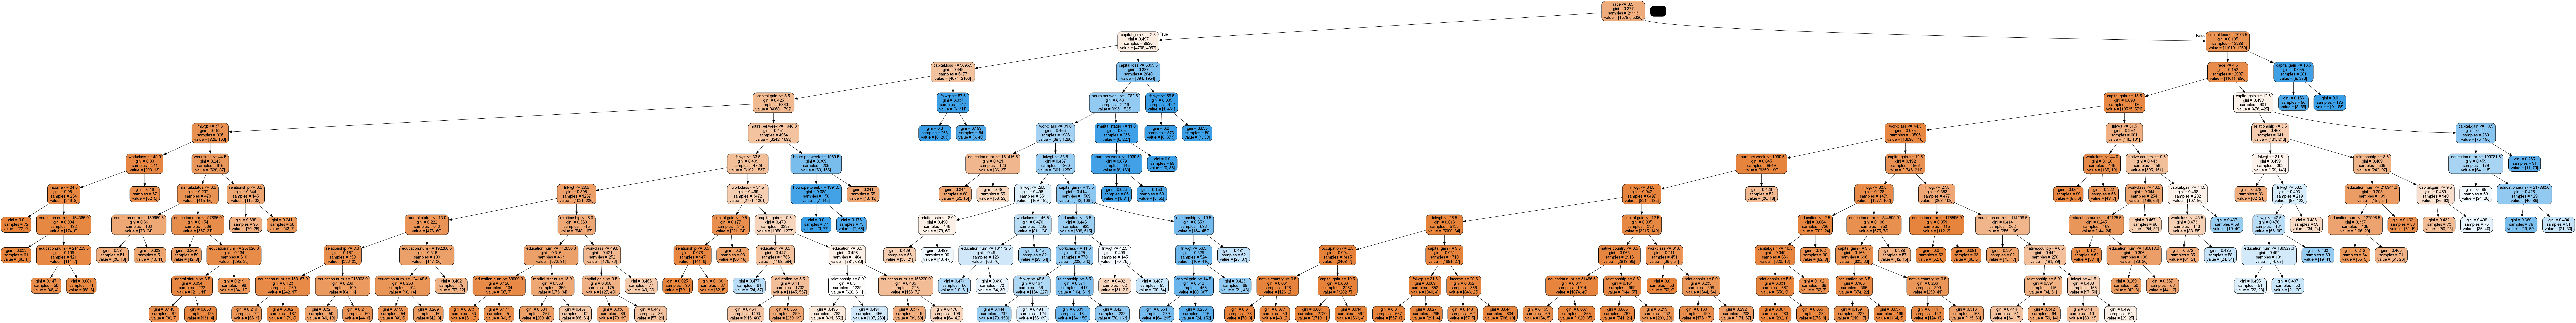

In [65]:
dot_data=StringIO()
export_graphviz(clf_gini, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [66]:
clf_gini=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=50, min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [68]:
print(clf_gini.score(X_train, y_train))

0.8344148155165064


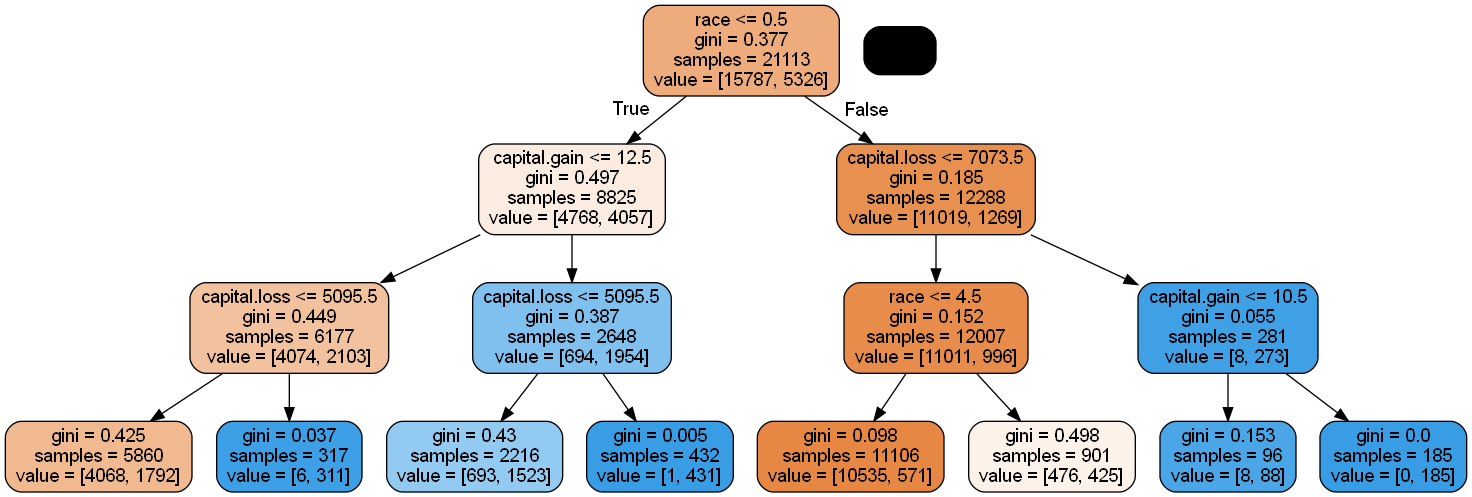

In [69]:
dot_data=StringIO()
export_graphviz(clf_gini, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [72]:
print(confusion_matrix(y_test, y_pred))

[[6564  303]
 [1151 1031]]


You began by importing necessary libraries such as pandas, numpy, matplotlib, and seaborn. Then, you read a CSV file named ‘adult_dataset.csv’ into a DataFrame called adult_df. You performed basic exploratory data analysis (EDA) by checking for missing values, examining the shape of the dataset, and describing its statistical properties.

Next, you handled missing values in the ‘workclass’ column by dropping rows containing ‘?’ entries. You encoded categorical variables using Label Encoder and concatenated the transformed categorical columns back with the original DataFrame. The ‘income’ column was converted to a categorical type.

You split the data into training and testing sets, built a decision tree classifier with a specified maximum depth, and evaluated its performance using classification metrics. Additionally, you visualized the decision tree using Graphviz.

Finally, you performed hyperparameter tuning using GridSearchCV to find optimal values for ‘max_depth’ and ‘min_samples_leaf’. You plotted accuracy scores against different hyperparameter values.